# Exploración y preprocesamiento de datos

Tarea: Explorar y preprocesar los datos para identificar patrones, tendencias y relaciones significativas.

Instrucciones:

* Realizar análisis exploratorio de datos (EDA) utilizando visualizaciones y estadísticas descriptivas.
* Aplicar técnicas de preprocesamiento como normalización, codificación de variables categóricas y reducción de dimensionalidad.

Importancia: La exploración y el preprocesamiento permiten comprender mejor los datos y preparar un conjunto de datos optimizado para el modelado, mejorando así la calidad de los resultados.

In [1]:
# Se importan las librerias necesarias para la exploracion de datos y el preprocesamiento de los mismos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Cargar el conjunto de datos
ds_limpio_df = pd.read_csv("../../data/processed/TCGA_GBM_LGG_Mutations_clean.csv")


In [3]:
# Análisis Exploratorio de Datos (EDA)
# Generar estadísticas descriptivas
print(ds_limpio_df.describe())

            Grade      Gender  Age_at_diagnosis        Race  Tumor_Type   
count  858.000000  858.000000        857.000000  858.000000  858.000000  \
mean     0.419580    0.581585         50.924282    1.083916    1.843823   
std      0.493778    0.493587         15.732749    0.398302    1.182857   
min      0.000000    0.000000         14.420000    0.000000    0.000000   
25%      0.000000    0.000000         38.020000    1.000000    1.000000   
50%      0.000000    1.000000         51.550000    1.000000    2.000000   
75%      1.000000    1.000000         62.770000    1.000000    3.000000   
max      1.000000    1.000000         89.290000    4.000000    3.000000   

       Tumor_Specification        IDH1        TP53        ATRX        PTEN   
count           858.000000  858.000000  858.000000  858.000000  858.000000  \
mean              0.668998    0.481352    0.411422    0.255245    0.166667   
std               0.835331    0.499944    0.492378    0.436253    0.372895   
min         

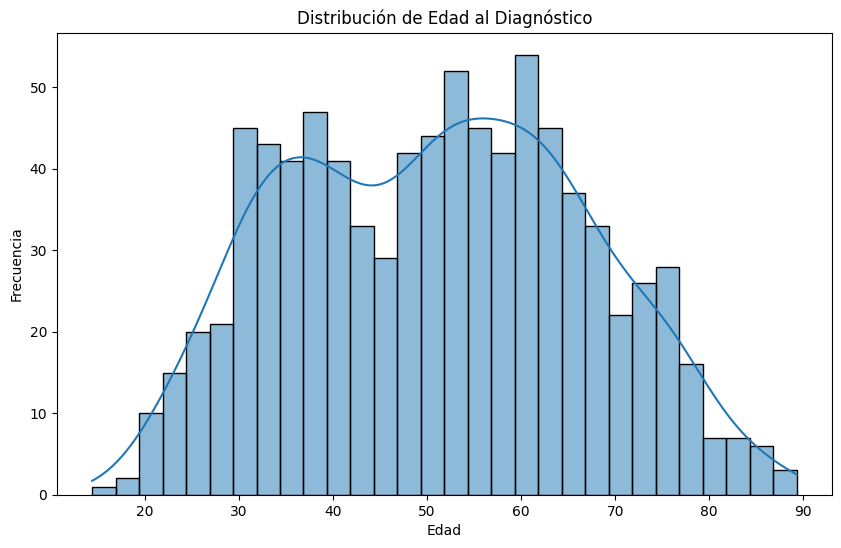

In [4]:
# Visualización de la distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(ds_limpio_df['Age_at_diagnosis'], bins=30, kde=True)
plt.title('Distribución de Edad al Diagnóstico')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

La gráfica anterior nos da una idea de que el rango de edad que más padece tumores es de 50 a 65 años, seguido del rango de 30 a 40 años, lo que nos proporciona un importante indicador de las edades en las que es más probable la aparición de tumores.

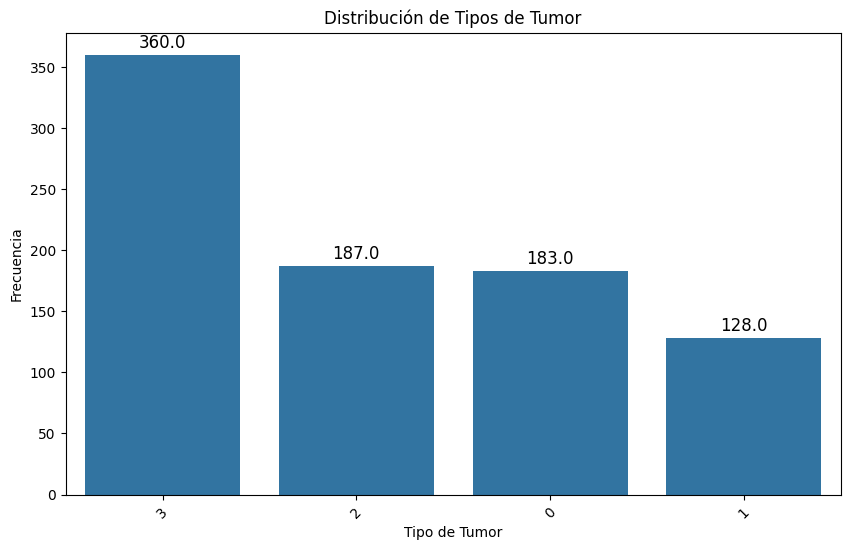

In [5]:
# Visualización de la distribución de tipos de tumor
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=ds_limpio_df, x='Tumor_Type', order=ds_limpio_df['Tumor_Type'].value_counts().index)
plt.title('Distribución de Tipos de Tumor')
plt.xlabel('Tipo de Tumor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Añadir anotaciones encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

La gráfica anterior muestra que el tipo de tumor 3 (Glioblastoma) es el más prevalente, seguido de un casi empate entre el tipo 2 (Astrocitoma) y el tipo 0 (Oligodendroglioma). El tumor menos frecuente es el tipo 1 (Glioma mixto).

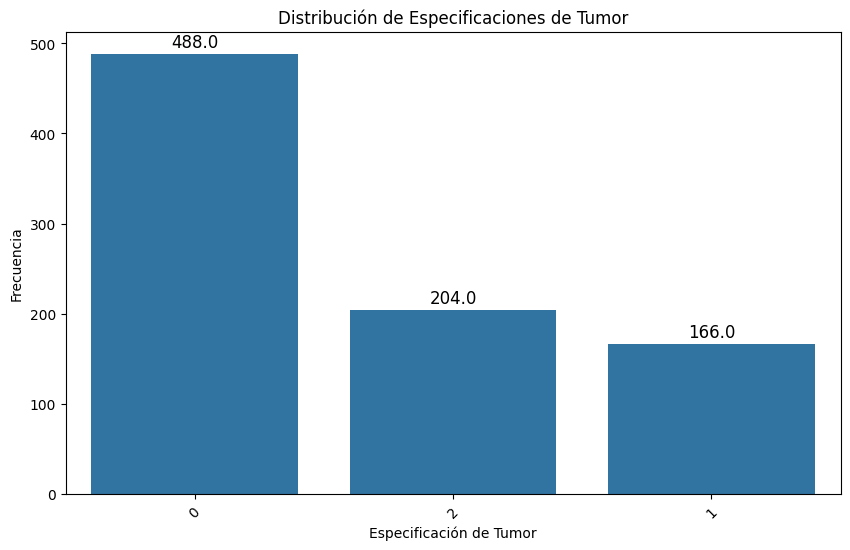

In [6]:
# Visualización de la distribución de especificaciones de tumor
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=ds_limpio_df, x='Tumor_Specification', order=ds_limpio_df['Tumor_Specification'].value_counts().index)
plt.title('Distribución de Especificaciones de Tumor')
plt.xlabel('Especificación de Tumor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Añadir anotaciones encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

En la gráfica destaca el dato 0 (None), lo cual se debe a que el tipo de tumor 3 (Glioblastoma) es el que presenta la mayor cantidad de casos sin especificación. Esta gráfica es útil para analizar los otros tipos de tumores, donde se observa que el 55.13% tienen la especificación 'NOS' (Not Otherwise Specified) y el 44.87% restante son anaplásicos. Esto indica que la mayoría de los casos están en la categoría de 'sin especificación', mientras que una minoría cuenta con una especificación clara.

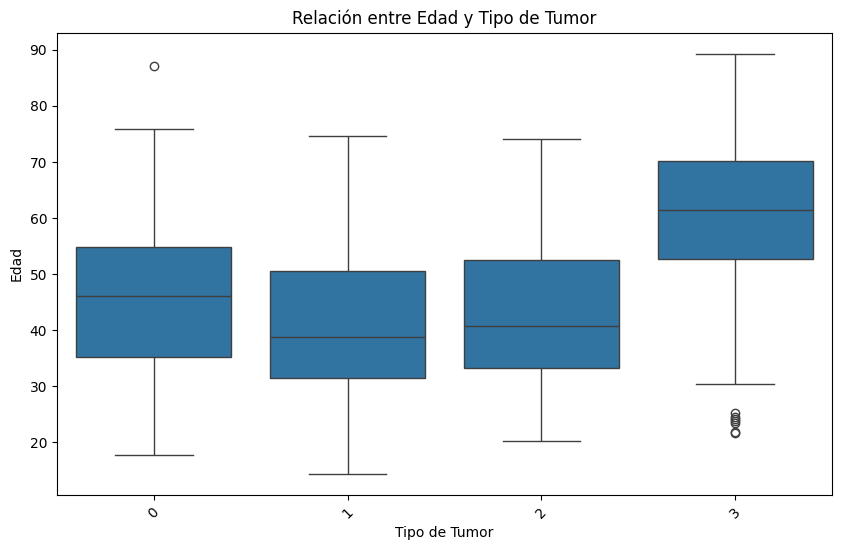

In [7]:
# Visualización de la relación entre edad y tipo de tumor
plt.figure(figsize=(10, 6))
sns.boxplot(data=ds_limpio_df, x='Tumor_Type', y='Age_at_diagnosis')
plt.title('Relación entre Edad y Tipo de Tumor')
plt.xlabel('Tipo de Tumor')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()

Esta grafica nos dice que el tumor tipo 3 (Glioblastoma) afecta a un rango de edad más amplio y tiende a presentarse en personas mayores, mientras que el tipo 1 (Glioma mixto) parece concentrarse en un rango de edad más joven. Los otros tipos de tumores tienen distribuciones más consistentes en edades entre los 30 y los 60 años.

In [8]:
# Preprocesamiento de Datos
# Normalización de datos numéricos
scaler = StandardScaler()
numeric_columns = ['Age_at_diagnosis']
ds_limpio_df[numeric_columns] = scaler.fit_transform(ds_limpio_df[numeric_columns])


In [9]:
# Manejar valores nulos (eliminación)
ds_limpio_df.dropna(inplace=True)

In [10]:
# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(ds_limpio_df)
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])


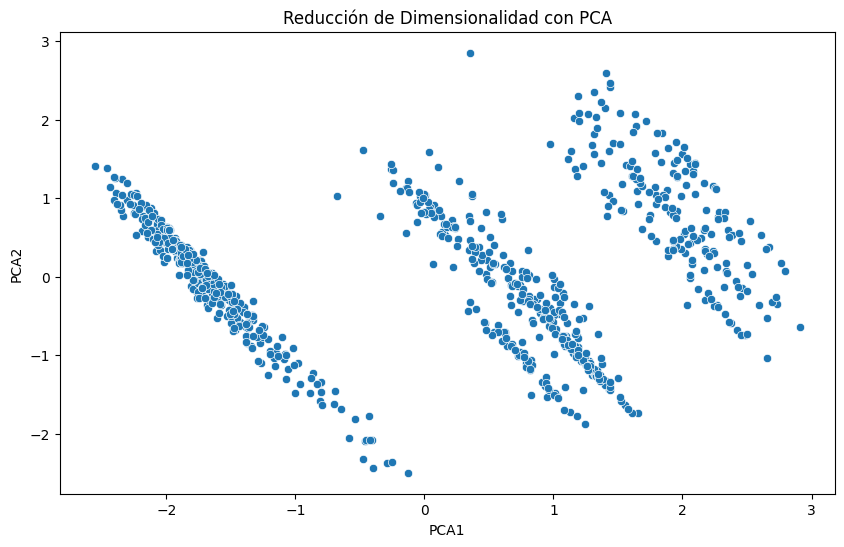

In [11]:
# Visualización de los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('Reducción de Dimensionalidad con PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

En esta gráfica se muestran los dos primeros componentes principales obtenidos mediante PCA. Se observan tres grupos bien definidos (pudiendo ser la especificidad del tumor), lo que indica una separación clara en los datos. Dentro de cada grupo, se presenta una correlación inversa, ya que los puntos se distribuyen diagonalmente: cuando los valores de PCA1 son altos, los valores de PCA2 tienden a ser bajos, y viceversa.

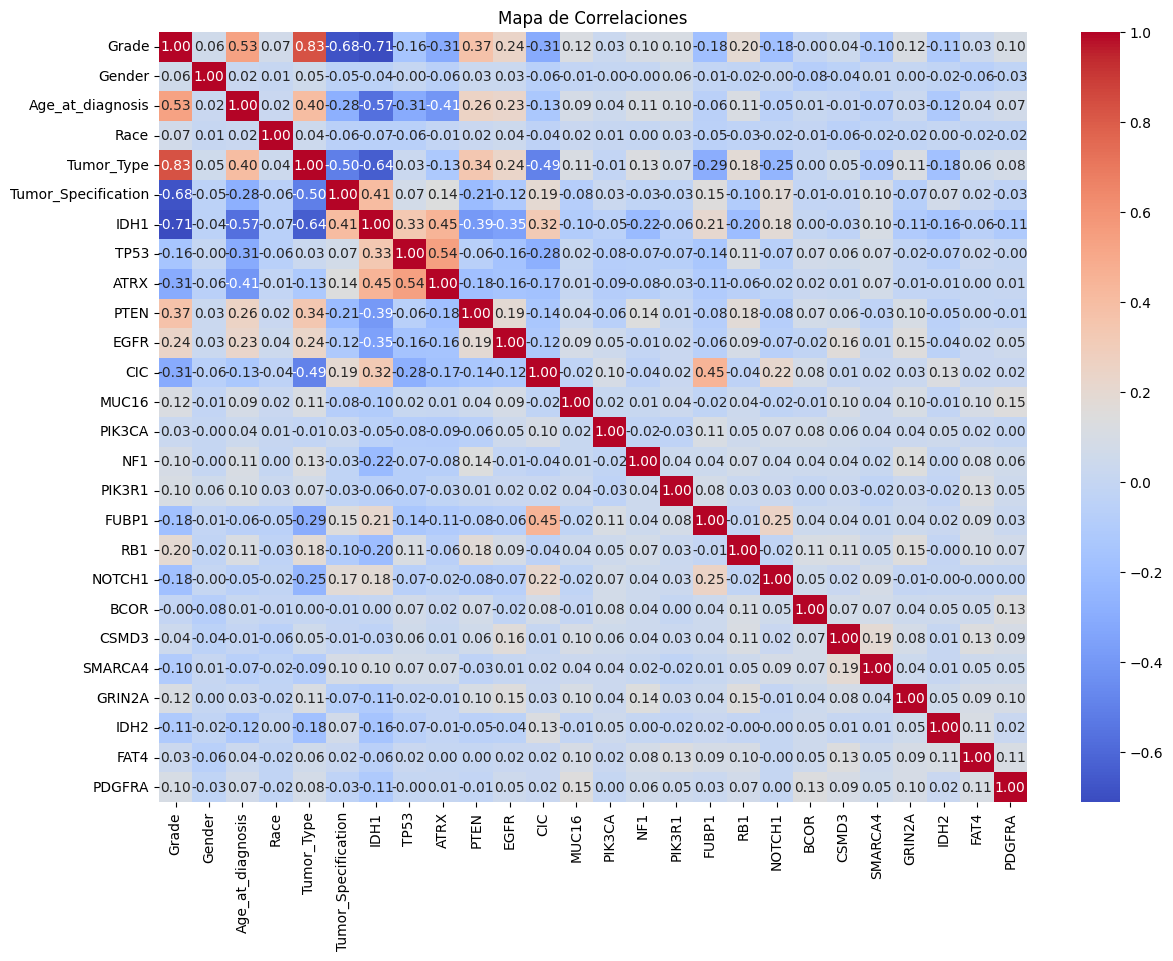

In [12]:
# Generar el mapa de correlaciones
plt.figure(figsize=(14, 10))
correlation_matrix = ds_limpio_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlaciones')
plt.show()

En este mapa de correlaciones se destacan varios patrones importantes. Observamos una relación positiva significativa entre varios genes y características clínicas. Por ejemplo, el gen CIC muestra una fuerte correlación positiva (0.45) con FUBP1, lo que podría sugerir una interacción relevante entre estos factores. Además, genes como IDH1 y TP53 tienen una correlación inversa notable con varios otros genes, indicando posibles antagonismos o efectos contrarios en sus roles biológicos.

Otro aspecto resaltante es la correlación entre Tumor Type y Tumor Specification (-0.49), lo que sugiere que a medida que una especificación aumenta, la otra tiende a disminuir. Este patrón refleja una separación clara en los datos, lo que podría ser de utilidad para clasificar diferentes tipos de tumores basados en estas variables.

También es interesante notar cómo Grade muestra una correlación negativa con IDH1 (-0.71), lo que puede indicar que conforme el grado del tumor aumenta, la expresión de IDH1 tiende a disminuir. En general, el mapa revela varias relaciones entre genes y características del tumor, que podrían ser investigadas más a fondo para descubrir mecanismos subyacentes en la progresión tumoral.